In [53]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PART I-A 

In [54]:
df_data_IA = pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv')
df_data_IA

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [55]:
# Eliminating Union Territories
union_territories = ['Delhi', 'Chandigarh', 'Andaman & Nicobar Islands', 'Puducherry']
states = [i for i in df_data_IA.columns if i not in union_territories]

In [56]:
df_data_IA_states = df_data_IA[states]

In [57]:
100*(df_data_IA_states.isnull().sum()/len(df_data_IA_states))

Items  Description      0.000000
Duration                0.000000
Andhra Pradesh          0.000000
Arunachal Pradesh      18.181818
Assam                  18.181818
Bihar                  18.181818
Chhattisgarh            0.000000
Goa                    18.181818
Gujarat                18.181818
Haryana                 0.000000
Himachal Pradesh       36.363636
Jammu & Kashmir        18.181818
Jharkhand              18.181818
Karnataka              18.181818
Kerala                 18.181818
Madhya Pradesh          0.000000
Maharashtra            36.363636
Manipur                36.363636
Meghalaya               0.000000
Mizoram                36.363636
Nagaland               36.363636
Odisha                  0.000000
Punjab                 36.363636
Rajasthan              36.363636
Sikkim                 18.181818
Tamil Nadu              0.000000
Telangana               0.000000
Tripura                36.363636
Uttar Pradesh          18.181818
Uttarakhand            18.181818
West Benga

We can see that the West Bengal column is completely empty so we can't analyze it and therefore we must drop it.

In [58]:
not_W_B = [i for i in df_data_IA_states.columns if i not in ['West Bengal1']]

In [59]:
df_data_IA_states = df_data_IA_states[not_W_B]

Now we fix the remaining missing values. For that we have adopted the 'fill with the previous value' approach. It's a optimistic as well as realistic approach in the sense we are optimistic that at least in the current year the growth rate of the state is not below the previous year and realistic in the sense it may not be better than the previous year.

But to do that we first split the dataframe in 2 parts. The reason for that is that the first 6 rows contain values in terms of absolute GSDP whereas the remaining rows contain values in terms of growth rate. Finally we concatinated the 2 dataframes into 1.

In [60]:
df_data_IA_states_GSDP = df_data_IA_states.iloc[0:6, :]
df_data_IA_states_GSDP_growth = df_data_IA_states.iloc[6:, :]

In [61]:
df_data_IA_states_GSDP = df_data_IA_states_GSDP.fillna(method='ffill')
df_data_IA_states_GSDP_growth = df_data_IA_states_GSDP_growth.fillna(method='ffill')

In [62]:
df_data_IA_states = pd.concat([df_data_IA_states_GSDP, df_data_IA_states_GSDP_growth])

We can compare the growth rate of 2 states by computing mean of all the states and comparing them.

# Plot of the Growth Rate for different states

***I am using barplot and regplot for plotting the growth rate different states. Barplot so as to visualize the growth rate*** ***for each year individually and also to compare them at the same time and Regplot to see the average trend.*** 

Text(0, 0.5, 'Growth Rate')

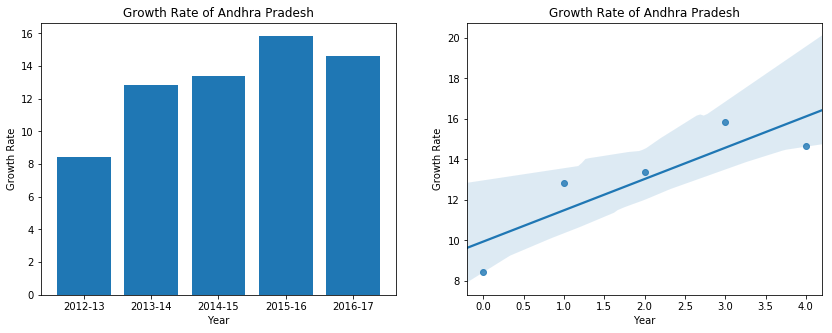

In [63]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Andhra Pradesh '])
plt.title('Growth Rate of Andhra Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Andhra Pradesh '])
plt.title('Growth Rate of Andhra Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

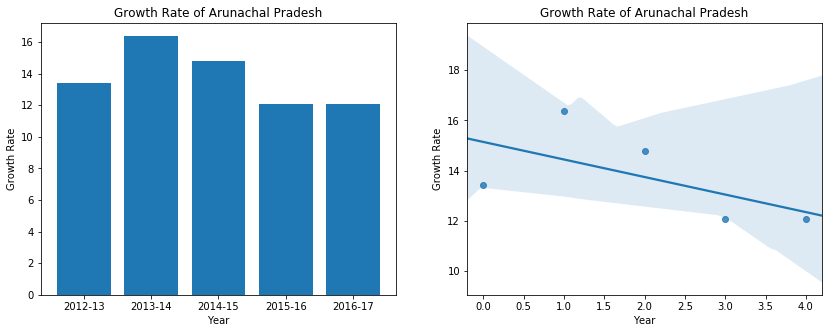

In [64]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Arunachal Pradesh'])
plt.title('Growth Rate of Arunachal Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Arunachal Pradesh'])
plt.title('Growth Rate of Arunachal Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

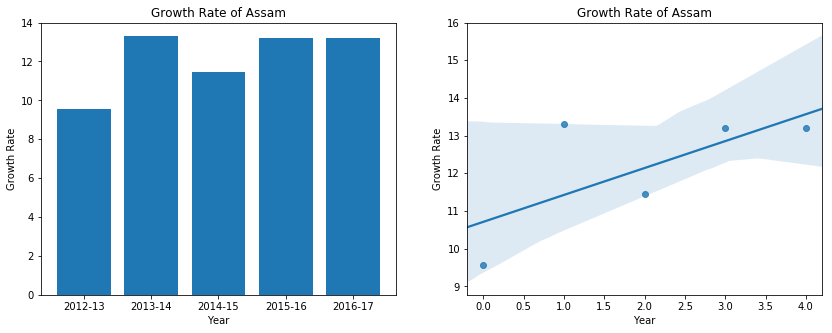

In [65]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Assam'])
plt.title('Growth Rate of Assam')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Assam'])
plt.title('Growth Rate of Assam')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

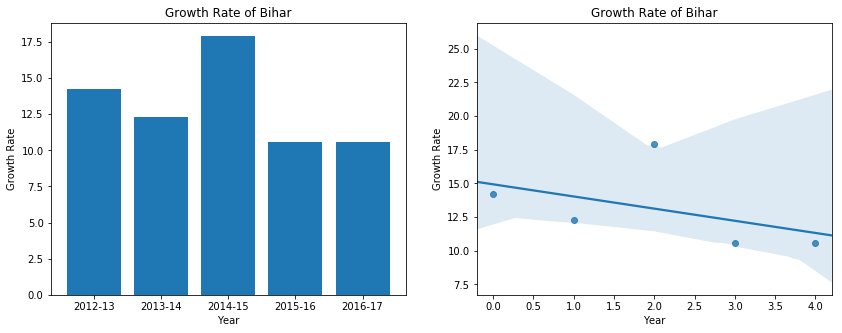

In [66]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Bihar'])
plt.title('Growth Rate of Bihar')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Bihar'])
plt.title('Growth Rate of Bihar')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

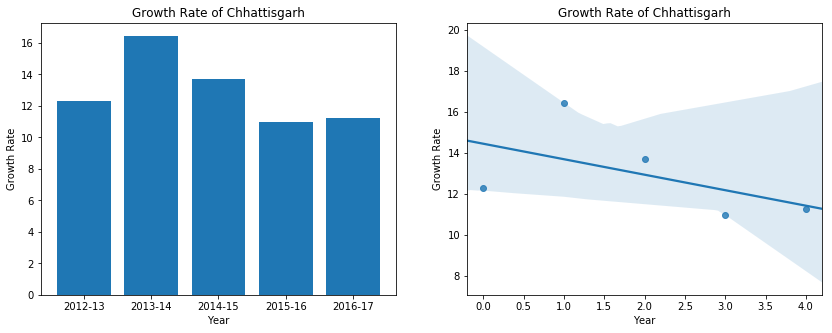

In [67]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Chhattisgarh'])
plt.title('Growth Rate of Chhattisgarh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Chhattisgarh'])
plt.title('Growth Rate of Chhattisgarh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

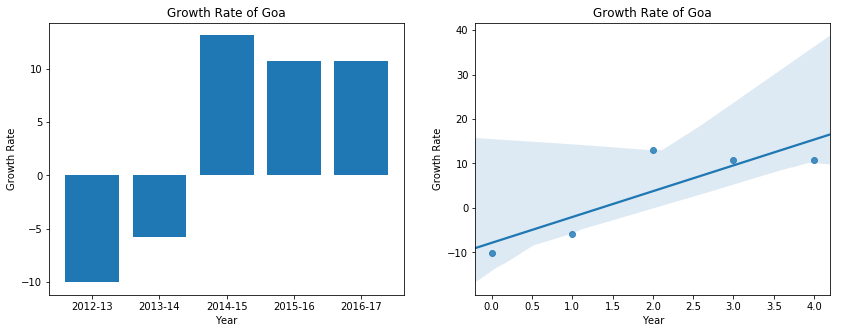

In [68]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Goa'])
plt.title('Growth Rate of Goa')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Goa'])
plt.title('Growth Rate of Goa')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

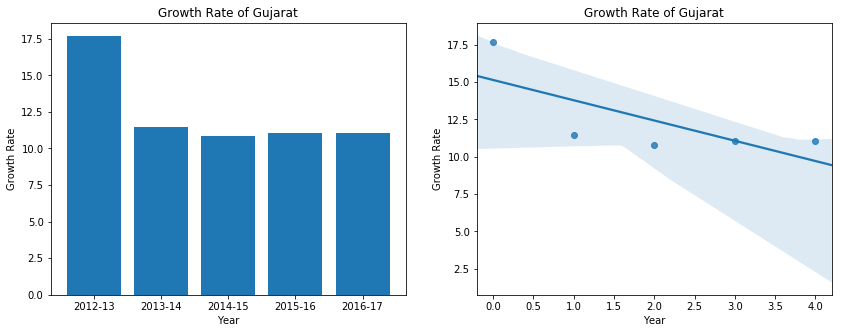

In [69]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Gujarat'])
plt.title('Growth Rate of Gujarat')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Gujarat'])
plt.title('Growth Rate of Gujarat')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

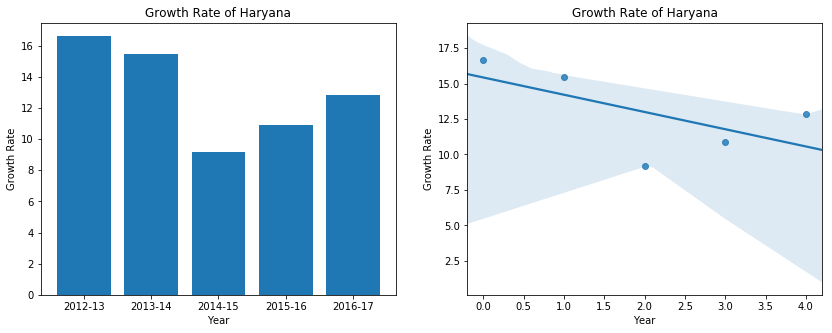

In [70]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Haryana'])
plt.title('Growth Rate of Haryana')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Haryana'])
plt.title('Growth Rate of Haryana')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

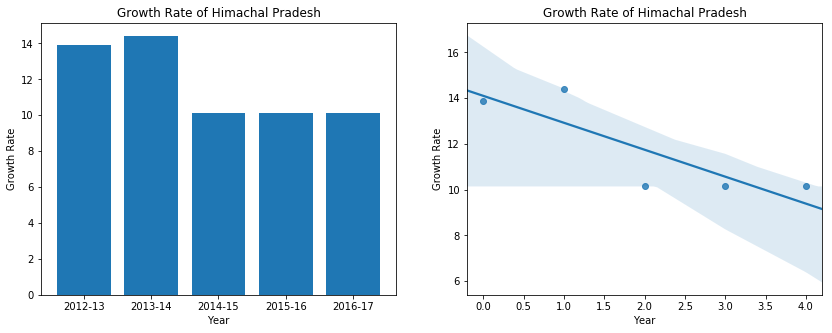

In [71]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Himachal Pradesh'])
plt.title('Growth Rate of Himachal Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Himachal Pradesh'])
plt.title('Growth Rate of Himachal Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

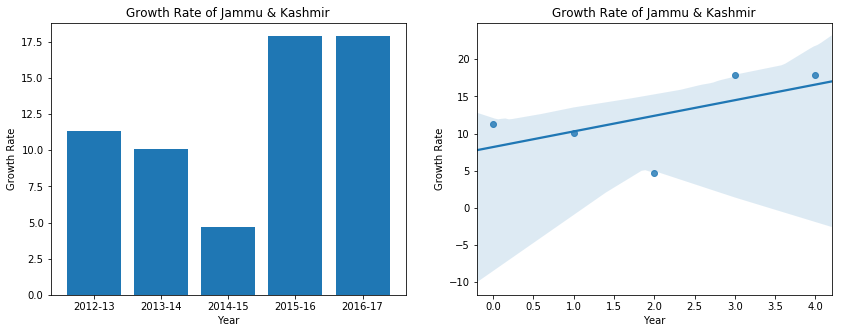

In [72]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Jammu & Kashmir'])
plt.title('Growth Rate of Jammu & Kashmir')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Jammu & Kashmir'])
plt.title('Growth Rate of Jammu & Kashmir')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

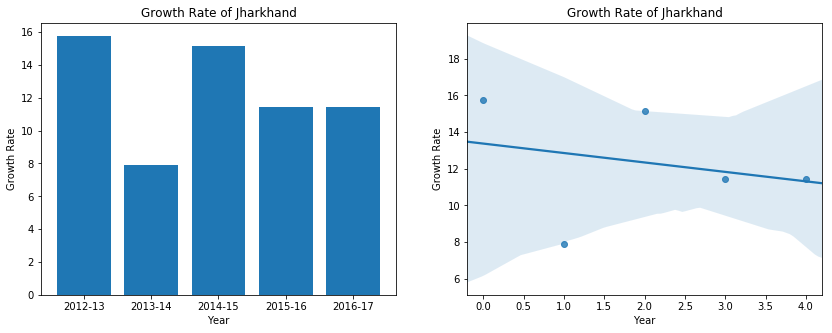

In [73]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Jharkhand'])
plt.title('Growth Rate of Jharkhand')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Jharkhand'])
plt.title('Growth Rate of Jharkhand')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

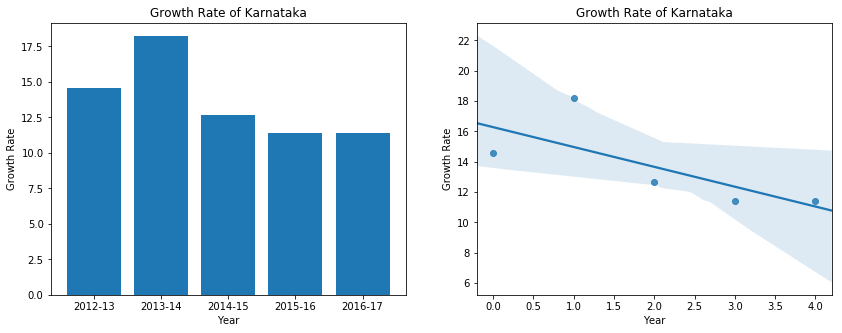

In [74]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Karnataka'])
plt.title('Growth Rate of Karnataka')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Karnataka'])
plt.title('Growth Rate of Karnataka')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

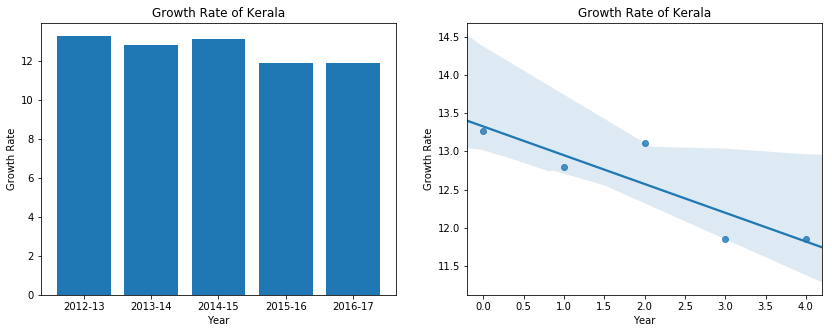

In [75]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Kerala'])
plt.title('Growth Rate of Kerala')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Kerala'])
plt.title('Growth Rate of Kerala')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

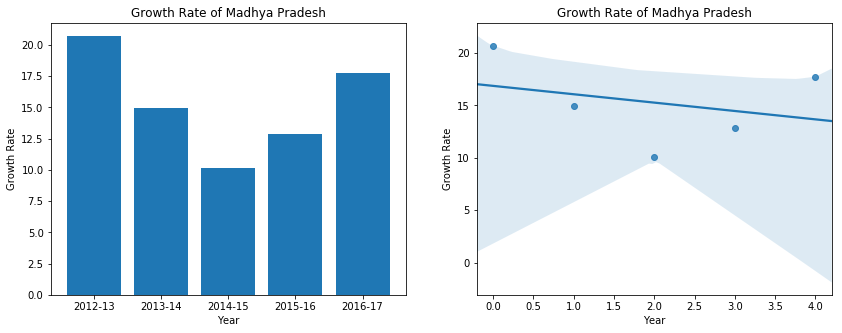

In [76]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Madhya Pradesh'])
plt.title('Growth Rate of Madhya Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Madhya Pradesh'])
plt.title('Growth Rate of Madhya Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

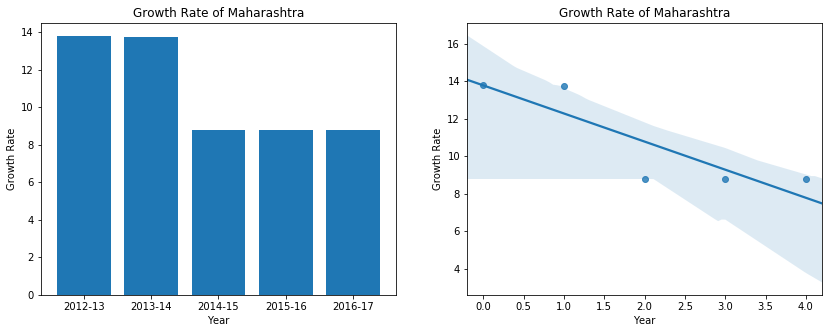

In [77]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Maharashtra'])
plt.title('Growth Rate of Maharashtra')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Maharashtra'])
plt.title('Growth Rate of Maharashtra')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

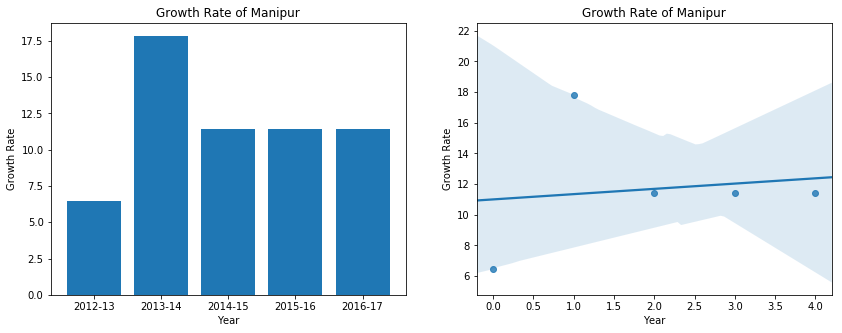

In [78]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Manipur'])
plt.title('Growth Rate of Manipur')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Manipur'])
plt.title('Growth Rate of Manipur')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

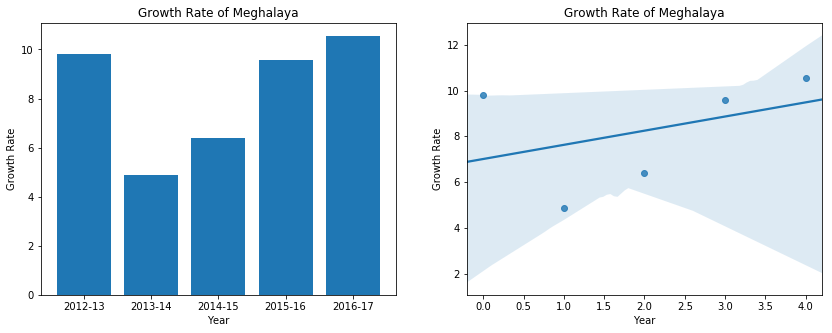

In [79]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Meghalaya'])
plt.title('Growth Rate of Meghalaya')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Meghalaya'])
plt.title('Growth Rate of Meghalaya')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

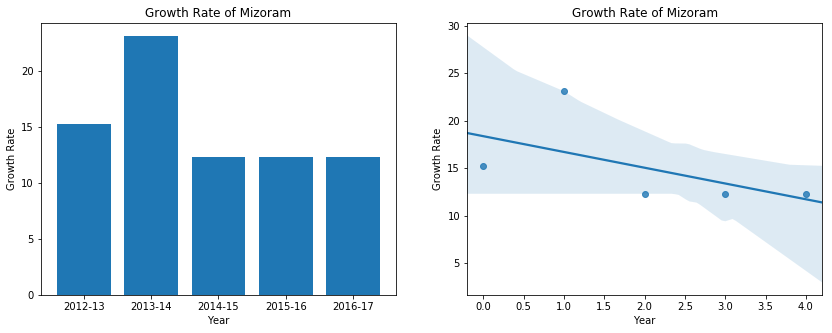

In [80]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Mizoram'])
plt.title('Growth Rate of Mizoram')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Mizoram'])
plt.title('Growth Rate of Mizoram')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

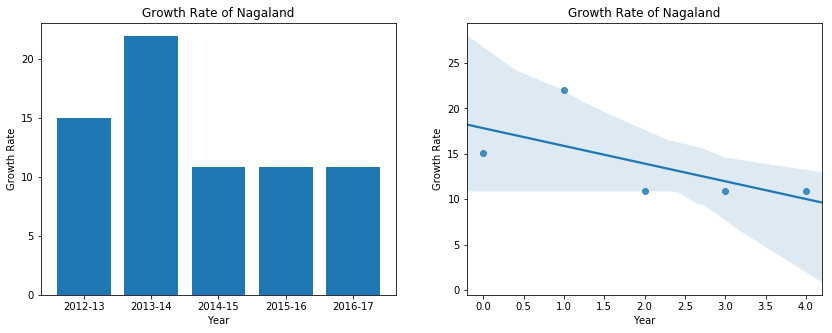

In [81]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Nagaland'])
plt.title('Growth Rate of Nagaland')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Nagaland'])
plt.title('Growth Rate of Nagaland')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

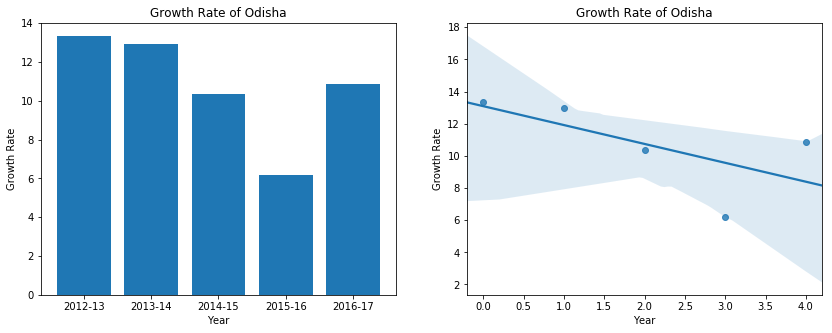

In [82]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Odisha'])
plt.title('Growth Rate of Odisha')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Odisha'])
plt.title('Growth Rate of Odisha')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

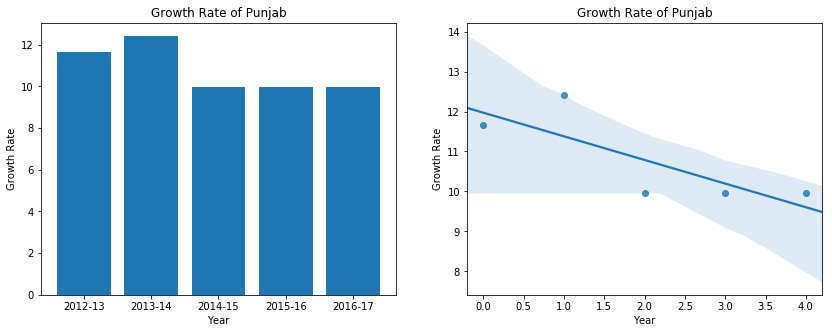

In [83]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Punjab'])
plt.title('Growth Rate of Punjab')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Punjab'])
plt.title('Growth Rate of Punjab')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

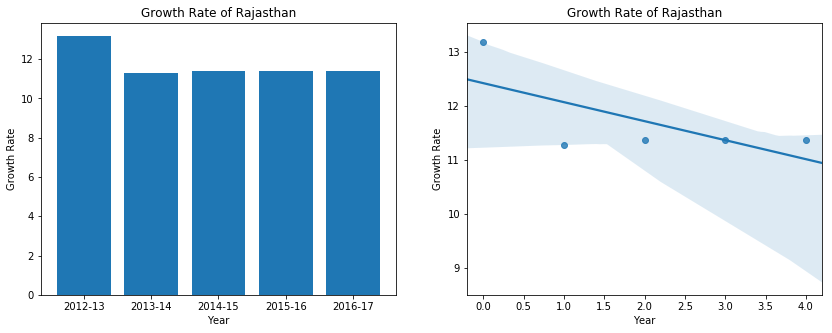

In [84]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Rajasthan'])
plt.title('Growth Rate of Rajasthan')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Rajasthan'])
plt.title('Growth Rate of Rajasthan')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

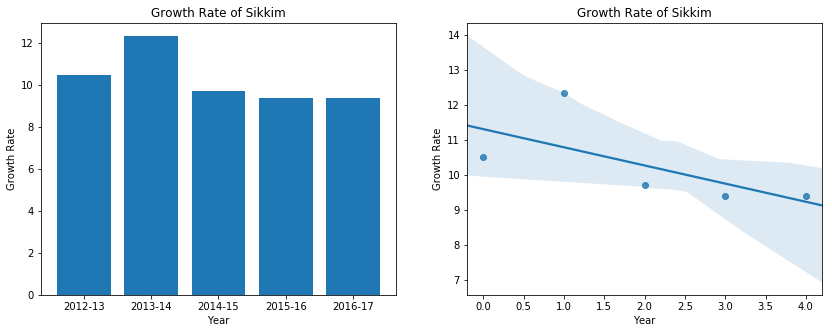

In [85]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Sikkim'])
plt.title('Growth Rate of Sikkim')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Sikkim'])
plt.title('Growth Rate of Sikkim')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

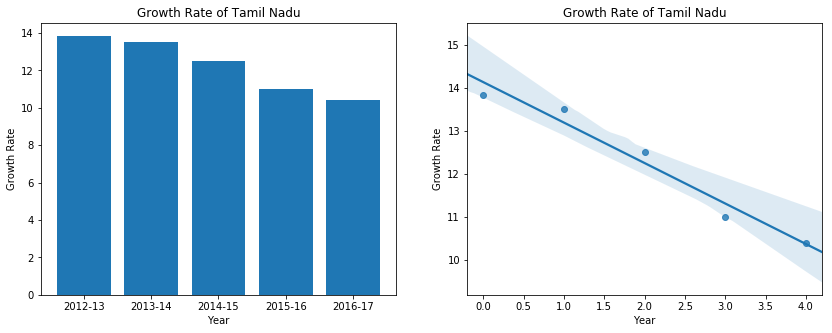

In [86]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Tamil Nadu'])
plt.title('Growth Rate of Tamil Nadu')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Tamil Nadu'])
plt.title('Growth Rate of Tamil Nadu')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

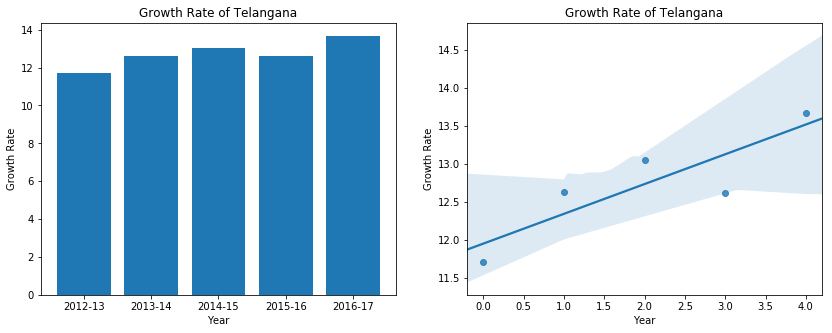

In [87]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Telangana'])
plt.title('Growth Rate of Telangana')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Telangana'])
plt.title('Growth Rate of Telangana')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

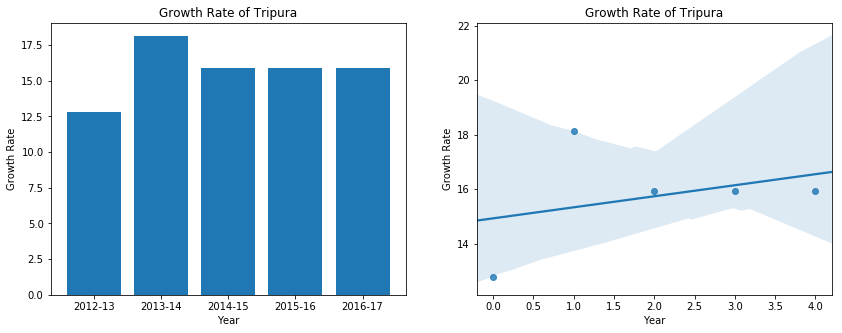

In [88]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Tripura'])
plt.title('Growth Rate of Tripura')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Tripura'])
plt.title('Growth Rate of Tripura')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

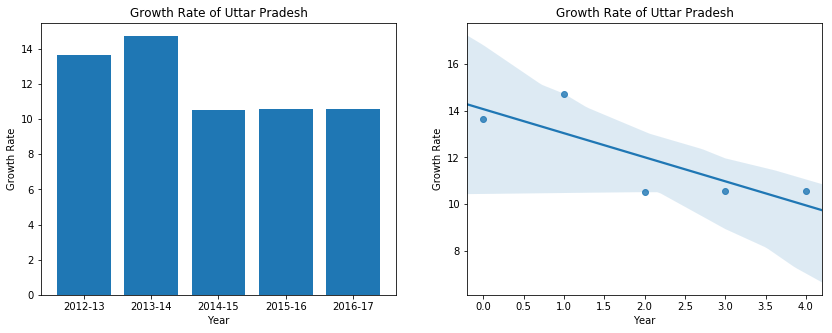

In [89]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Uttar Pradesh'])
plt.title('Growth Rate of Uttar Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Uttar Pradesh'])
plt.title('Growth Rate of Uttar Pradesh')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

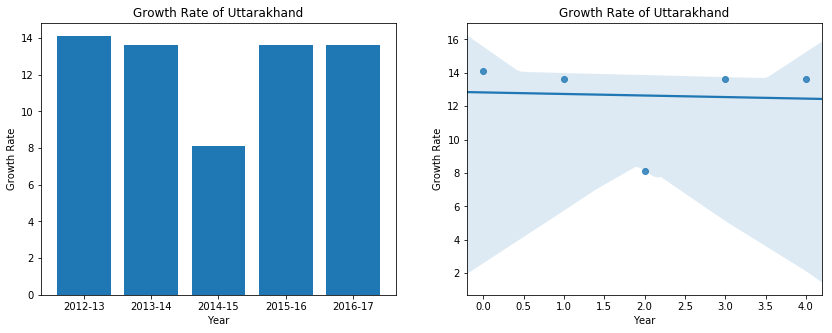

In [90]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['Uttarakhand'])
plt.title('Growth Rate of Uttarakhand')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['Uttarakhand'])
plt.title('Growth Rate of Uttarakhand')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

Text(0, 0.5, 'Growth Rate')

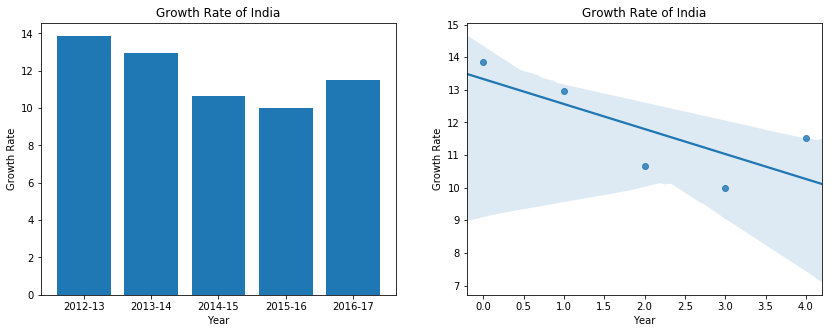

In [91]:
plt.figure(figsize = (14, 5))
plt.subplot(121)
plt.bar(df_data_IA_states_GSDP_growth['Duration'], df_data_IA_states_GSDP_growth['All_India GDP'])
plt.title('Growth Rate of India')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.subplot(122)
sns.regplot(list(range(len(df_data_IA_states_GSDP_growth['Duration']))), df_data_IA_states_GSDP_growth['All_India GDP'])
plt.title('Growth Rate of India')
plt.xlabel('Year')
plt.ylabel('Growth Rate')

In [92]:
fast_growing_states = df_data_IA_states_GSDP_growth.mean().sort_values(ascending = False).head(3)
slow_growing_states = df_data_IA_states_GSDP_growth.mean().sort_values(ascending = False).tail(3)

In [93]:
print(round(fast_growing_states,2))
print('')
print(round(slow_growing_states,2))

Tripura           15.74
Madhya Pradesh    15.27
Mizoram           15.04
dtype: float64

Sikkim       10.27
Meghalaya     8.24
Goa           3.77
dtype: float64


***We have chosen the average of the growth rate as a measure to compare the growth rate of 2 states decide the fastest*** ***growing states:***

The fastest growing states are:
1. Tripura - 15.74%
2. Madhya Pradesh - 15.27%
3. Mizoram - 15.04%

The slowest growing states are:
1. Goa - 3.77%
2. Meghalaya - 8.24%
3. Sikkim - 10.27%

In [94]:
print('The National average growth rate is ', round(df_data_IA_states_GSDP_growth['All_India GDP'].mean(), 2))

The National average growth rate is  11.8


In [95]:
#df_data_IA_states_GSDP_growth.columns
print('The average growth rate is ', round(df_data_IA_states_GSDP_growth['Jammu & Kashmir'].mean(), 2))
print("It's almost 1% better than the national average")

The average growth rate is  12.38
It's almost 1% better than the national average


# Total GDP Plot of different states for the period 2015-16

In [96]:
x = df_data_IA_states_GSDP.loc[df_data_IA_states_GSDP['Duration'] == '2015-16'].transpose()[2:-1]
x['State'] = df_data_IA_states_GSDP.loc[df_data_IA_states_GSDP['Duration'] == '2015-16'].transpose()[2:-1].index
x[4] = x[4].apply(lambda x : int(x))
x = x.sort_values(by = 4, ascending = False)

Text(0, 0.5, 'States')

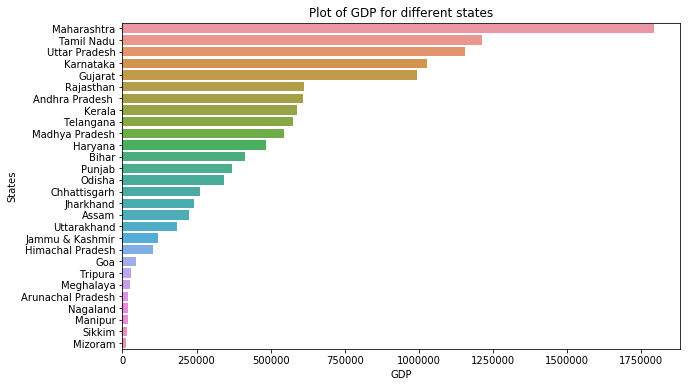

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(4, 'State', data = x)
plt.title('Plot of GDP for different states')
plt.xlabel('GDP')
plt.ylabel('States')

In [98]:
print('The 5 states having highest GDP from top to bottom is: ')
print('')
print(pd.Series(x['State'].index)[:5])
print('')
print('Maharashtra having the highest GDP')

The 5 states having highest GDP from top to bottom is: 

0      Maharashtra
1       Tamil Nadu
2    Uttar Pradesh
3        Karnataka
4          Gujarat
dtype: object

Maharashtra having the highest GDP


In [99]:
print('The 5 states having lowest GDP from bottom to top is:')
print('')
print(pd.Series(x['State'].index).tail())
print('')
print('Mizoram having the lowest GDP')

The 5 states having lowest GDP from bottom to top is:

23    Arunachal Pradesh
24             Nagaland
25              Manipur
26               Sikkim
27              Mizoram
dtype: object

Mizoram having the lowest GDP


***I am choosing GDP per capita in combination with the average growth rate as a measure to grade the best performing*** ***states since GDP per capita tells us about the contribution of an individual in the GDP.*** 

Sikkim is certainly one of the best performing states because it's GDP per capita is 240274 which is the second highest and also it's average growth rate is more than 10%. Haryana is also the one of the best performing states with GDP per capita of 164077 and average growth rate of more than 12%
Uttar Pradesh and Jharkhand on the other hand are not good performers since their GDP per capita are among the lowest and even though their average growth rate is nearly 12 but it's still among the lowest.

# PART I-B

In [100]:
df_andhra_pradesh = pd.read_csv('NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
df_andaman_and_nicobar_islands = pd.read_csv('NAD-Andaman_Nicobar_Islands-GSVA_cur_2014-15.csv')
df_arunachal_pradesh = pd.read_csv('NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
df_assam = pd.read_csv('NAD-Assam-GSVA_cur_2015-16.csv')
df_bihar = pd.read_csv('NAD-Bihar-GSVA_cur_2015-16.csv')
df_chandigarh = pd.read_csv('NAD-Chandigarh-GSVA_cur_2015-16.csv')
df_chhattisgarh = pd.read_csv('NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
df_delhi = pd.read_csv('NAD-Delhi-GSVA_cur_2016-17.csv')
df_goa = pd.read_csv('NAD-Goa-GSVA_cur_2015-16.csv')
df_gujarat = pd.read_csv('NAD-Gujarat-GSVA_cur_2015-16.csv')
df_haryana = pd.read_csv('NAD-Haryana-GSVA_cur_2016-17.csv')
df_himachal_pradesh = pd.read_csv('NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
df_jammu_and_kashmir = pd.read_csv('NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv')
df_jharkhand = pd.read_csv('NAD-Jharkhand-GSVA_cur_2015-16.csv')
df_karnataka = pd.read_csv('NAD-Karnataka-GSVA_cur_2015-16.csv')
df_kerala = pd.read_csv('NAD-Kerala-GSVA_cur_2015-16.csv')
df_madhya_pradesh = pd.read_csv('NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
df_maharashtra = pd.read_csv('NAD-Maharashtra-GSVA_cur_2014-15.csv')
df_manipur = pd.read_csv('NAD-Manipur-GSVA_cur_2014-15.csv', encoding = 'CP1252')
df_meghalaya = pd.read_csv('NAD-Meghalaya-GSVA_cur_2016-17.csv')
df_mizoram = pd.read_csv('NAD-Mizoram-GSVA_cur_2014-15.csv')
df_nagaland = pd.read_csv('NAD-Nagaland-GSVA_cur_2014-15.csv')
df_odisha = pd.read_csv('NAD-Odisha-GSVA_cur_2016-17.csv')
df_puducherry = pd.read_csv('NAD-Puducherry-GSVA_cur_2016-17.csv')
df_punjab = pd.read_csv('NAD-Punjab-GSVA_cur_2014-15.csv')
df_rajasthan = pd.read_csv('NAD-Rajasthan-GSVA_cur_2014-15.csv')
df_sikkim = pd.read_csv('NAD-Sikkim-GSVA_cur_2015-16.csv')
df_tamil_nadu = pd.read_csv('NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
df_telangana = pd.read_csv('NAD-Telangana-GSVA_cur_2016-17.csv')
df_tripura = pd.read_csv('NAD-Tripura-GSVA_cur_2014-15.csv')
df_uttar_pradesh = pd.read_csv('NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
df_uttarakhand = pd.read_csv('NAD-Uttarakhand-GSVA_cur_2015-16.csv')

In [101]:
x = pd.concat([df_andhra_pradesh['Item'],
                df_andhra_pradesh.rename(columns = {'2014-15' : 'Andhra Pradesh'})['Andhra Pradesh'],
                df_andaman_and_nicobar_islands.rename(columns = {'2014-15' : 'Andaman and Nicobar Islands'})['Andaman and Nicobar Islands'],
                df_arunachal_pradesh.rename(columns = {'2014-15' : 'Arunachal Pradesh'})['Arunachal Pradesh'], 
                df_assam.rename(columns = {'2014-15' : 'Assam'})['Assam'], 
                df_bihar.rename(columns = {'2014-15' : 'Bihar'})['Bihar'],
                df_chandigarh.rename(columns = {'2014-15' : 'Chandigarh'})['Chandigarh'],
                df_chhattisgarh.rename(columns = {'2014-15' : 'Chhattisgarh'})['Chhattisgarh'], 
                df_delhi.rename(columns = {'2014-15' : 'Delhi'})['Delhi'],
                df_goa.rename(columns = {'2014-15' : 'Goa'})['Goa'], 
                df_gujarat.rename(columns = {'2014-15' : 'Gujarat'})['Gujarat'], 
                df_haryana.rename(columns = {'2014-15' : 'Haryana'})['Haryana'], 
                df_himachal_pradesh.rename(columns = {'2014-15' : 'Himachal Pradesh'})['Himachal Pradesh'],
                df_jammu_and_kashmir.rename(columns = {'2014-15' : 'Jammu and Kashmir'})['Jammu and Kashmir'],
                df_jharkhand.rename(columns = {'2014-15' : 'Jharkhand'})['Jharkhand'], 
                df_karnataka.rename(columns = {'2014-15' : 'Karnataka'})['Karnataka'], 
                df_kerala.rename(columns = {'2014-15' : 'Kerala'})['Kerala'], 
                df_madhya_pradesh.rename(columns = {'2014-15' : 'Madhya Pradesh'})['Madhya Pradesh'], 
                df_maharashtra.rename(columns = {'2014-15' : 'Maharashtra'})['Maharashtra'], 
                df_manipur.rename(columns = {'2014-15' : 'Manipur'})['Manipur'], 
                df_meghalaya.rename(columns = {'2014-15' : 'Meghalaya'})['Meghalaya'],
                df_mizoram.rename(columns = {'2014-15' : 'Mizoram'})['Mizoram'],
                df_nagaland.rename(columns = {'2014-15' : 'Nagaland'})['Nagaland'],
                df_odisha.rename(columns = {'2014-15' : 'Odisha'})['Odisha'],
                df_puducherry.rename(columns = {'2014-15' : 'Puducherry'})['Puducherry'],
                df_punjab.rename(columns = {'2014-15' : 'Punjab'})['Punjab'],
                df_rajasthan.rename(columns = {'2014-15' : 'Rajasthan'})['Rajasthan'],
                df_sikkim.rename(columns = {'2014-15' : 'Sikkim'})['Sikkim'],
                df_tamil_nadu.rename(columns = {'2014-15' : 'Tamil Nadu'})['Tamil Nadu'],
                df_telangana.rename(columns = {'2014-15' : 'Telangana'})['Telangana'],
                df_tripura.rename(columns = {'2014-15' : 'Tripura'})['Tripura'],
                df_uttar_pradesh.rename(columns = {'2014-15' : 'Uttar Pradesh'})['Uttar Pradesh'],
                df_uttarakhand.rename(columns = {'2014-15' : 'Uttarakhand'})['Uttarakhand']], axis = 1)

In [102]:
x.head()

,Item,Andhra Pradesh,Andaman and Nicobar Islands,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,...,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
0,"Agriculture, forestry and fishing",14819416,76670.0,686117,3855548,7951890,16233,3948847,250568,308507,...,6422978,113156,9285716,15044394,137447,13064238,7591501,799825.0,25097754,1601423.0
1,Crops,7893514,34026.0,415520,2890544,4688237,1659,2613371,64959,140421,...,4382636,38878,5690972,7673441,114976,7297820,4162493,397591.0,16215212,866146.0
2,Livestock,4309078,19560.0,38387,173478,2060296,13992,352208,183770,30141,...,788243,45358,2638842,5356257,17338,4693361,2951299,88176.0,7096876,391188.0
3,Forestry and logging,346160,4634.0,224017,261987,550132,388,597785,861,15744,...,791463,3931,848245,1956660,4529,392705,210741,145096.0,1404936,339293.0
4,Fishing and aquaculture,2270664,18451.0,8193,529539,653224,194,385483,978,122201,...,460636,24989,107657,58036,604,680352,266968,168961.0,380730,4796.0


In [103]:
states = [i for i in list(x.columns) if i not in ['Delhi', 'Chandigarh', 'Andaman and Nicobar Islands', 'Puducherry']]
x = x[states]
y = pd.DataFrame({'States' : list(x.iloc[:, 1:].columns),
                 'GDP per capita' : list(x.iloc[32, :].values[1:])})
y = y.sort_values(by = 'GDP per capita', ascending = False)
y.head()

,States,GDP per capita
5,Goa,271793.0
22,Sikkim,240274.0
7,Haryana,164077.0
12,Kerala,154778.0
27,Uttarakhand,153076.0


# Plot the GDP per capita for all the states

Text(0, 0.5, 'GDP per capita')

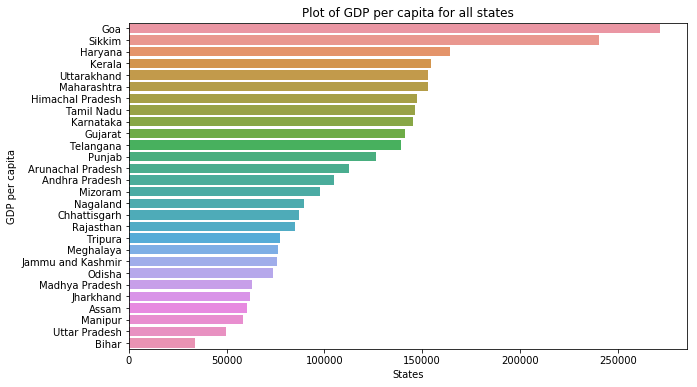

In [104]:
plt.figure(figsize = (10, 6))
sns.barplot(y = 'States', x = 'GDP per capita', data = y)
plt.title('Plot of GDP per capita for all states')
plt.xlabel('States')
plt.ylabel('GDP per capita')

In [105]:
print('Top 5 states are: ')
print('')
print(y['States'].head())

Top 5 states are: 

5             Goa
22         Sikkim
7         Haryana
12         Kerala
27    Uttarakhand
Name: States, dtype: object


In [106]:
print('Bottom 5 states are: ')
print('')
print(y['States'].tail())

Bottom 5 states are: 

10        Jharkhand
2             Assam
15          Manipur
26    Uttar Pradesh
3             Bihar
Name: States, dtype: object


In [107]:
print('The ratio of Highest GDP per caipta to lowest GDP per capita is: ', round((y['GDP per capita'].iloc[0])/(y['GDP per capita'].iloc[-1]), 2))

The ratio of Highest GDP per caipta to lowest GDP per capita is:  8.0


In [108]:
z = x.transpose()
c = z.iloc[0]
z.columns = c
z = z.iloc[1:, :]
z['State'] = pd.Series(z.index).values
z = pd.concat([z['State'], z['Primary'], z['Secondary'], z['Tertiary']], axis = 1)

In [109]:
z.head()

,State,Primary,Secondary,Tertiary
Andhra Pradesh,Andhra Pradesh,16303716,10488884,22032942
Arunachal Pradesh,Arunachal Pradesh,716959,287489,631844
Assam,Assam,5326697,4033091,9307109
Bihar,Bihar,8019997,5984896,22179969
Chhattisgarh,Chhattisgarh,6400817,8238886,7588778


In [110]:
z['Total GDP'] = list(x.loc[x['Item'] == 'Gross State Domestic Product'].values[0])[1:]
z.head()

,State,Primary,Secondary,Tertiary,Total GDP
Andhra Pradesh,Andhra Pradesh,16303716,10488884,22032942,52646842.0
Arunachal Pradesh,Arunachal Pradesh,716959,287489,631844,1676119.0
Assam,Assam,5326697,4033091,9307109,19809800.0
Bihar,Bihar,8019997,5984896,22179969,37391988.0
Chhattisgarh,Chhattisgarh,6400817,8238886,7588778,23498180.0


In [111]:
z['% Primary'] = 100*(z['Primary']/z['Total GDP'])
z['% Secondary'] = 100*(z['Secondary']/z['Total GDP'])
z['% Tertiary'] = 100*(z['Tertiary']/z['Total GDP'])

In [112]:
z.head()

,State,Primary,Secondary,Tertiary,Total GDP,% Primary,% Secondary,% Tertiary
Andhra Pradesh,Andhra Pradesh,16303716,10488884,22032942,52646842.0,30.9681,19.9231,41.8505
Arunachal Pradesh,Arunachal Pradesh,716959,287489,631844,1676119.0,42.7749,17.1521,37.6968
Assam,Assam,5326697,4033091,9307109,19809800.0,26.8892,20.3591,46.9823
Bihar,Bihar,8019997,5984896,22179969,37391988.0,21.4484,16.0058,59.3174
Chhattisgarh,Chhattisgarh,6400817,8238886,7588778,23498180.0,27.2396,35.0618,32.2952


In [113]:
z1 = z.loc[:,['State', '% Primary', '% Secondary', '% Tertiary']]

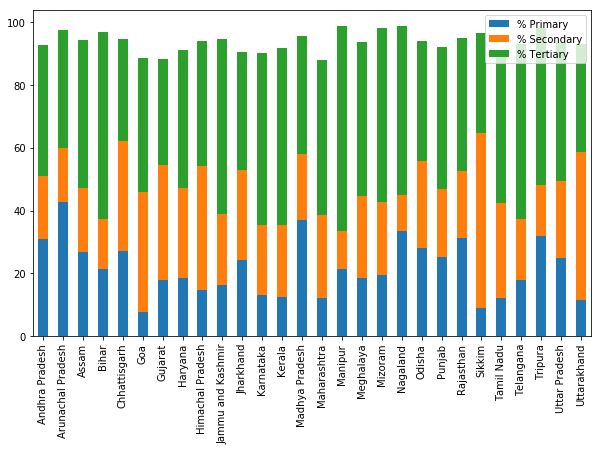

In [114]:
z1.plot(kind = 'bar', stacked = True, figsize = (10, 6))

# Reason behind (Primary + Secondary + Tertiary) not being equal to GSDP

We can see clearly from the above 2 graphs that the sum of Primary, Secondary and Tertiary is not equal to the Gross
State Domestic Product because GSDP = Primary + Secondary + Tertiary + Taxes - Subsidies.

In [115]:
z['GDP per capita'] = list(x.iloc[32].values)[1:]
z.head()

,State,Primary,Secondary,Tertiary,Total GDP,% Primary,% Secondary,% Tertiary,GDP per capita
Andhra Pradesh,Andhra Pradesh,16303716,10488884,22032942,52646842.0,30.9681,19.9231,41.8505,104977.0
Arunachal Pradesh,Arunachal Pradesh,716959,287489,631844,1676119.0,42.7749,17.1521,37.6968,112718.0
Assam,Assam,5326697,4033091,9307109,19809800.0,26.8892,20.3591,46.9823,60621.0
Bihar,Bihar,8019997,5984896,22179969,37391988.0,21.4484,16.0058,59.3174,33954.0
Chhattisgarh,Chhattisgarh,6400817,8238886,7588778,23498180.0,27.2396,35.0618,32.2952,86860.0


In [116]:
def category(n):
    if (n <= np.quantile(z['GDP per capita'], 1) and n > np.quantile(z['GDP per capita'], 0.85)):
        return 'C1'
    elif (n <= np.quantile(z['GDP per capita'], 0.85) and n > np.quantile(z['GDP per capita'], 0.5)):
        return 'C2'
    elif (n <= np.quantile(z['GDP per capita'], 0.5) and n > np.quantile(z['GDP per capita'], 0.2)):
        return 'C3'
    else:
        return 'C4'

In [117]:
z['Category'] = z['GDP per capita'].apply(category)

In [118]:
z1 = z.sort_values(by = 'GDP per capita', ascending = False)
z1.head()

,State,Primary,Secondary,Tertiary,Total GDP,% Primary,% Secondary,% Tertiary,GDP per capita,Category
Goa,Goa,312129,1547536,1738217,4063307.0,7.68165,38.0856,42.7784,271793.0,C1
Sikkim,Sikkim,138776,845253,483103,1520933.0,9.1244,55.5746,31.7636,240274.0,C1
Haryana,Haryana,8.04042e+06,1.25614e+07,1.92266e+07,43746207.0,18.3797,28.7143,43.9503,164077.0,C1
Kerala,Kerala,6489442,12070040,29673778,52600230.0,12.3373,22.9467,56.4138,154778.0,C1
Uttarakhand,Uttarakhand,1.84597e+06,7.64286e+06,5.58798e+06,16198529.0,11.3959,47.1825,34.4968,153076.0,C1


Below is the code to display the percentile of all the states.

In [119]:
from scipy import stats
g = []
for i in list(z1['GDP per capita'].values):
    g.append(stats.percentileofscore(z1['GDP per capita'],i))
g1 = pd.Series(g)
g1
df_g1 = pd.concat([g1, pd.Series(list(z1.index))], axis = 1)
df_g1.rename(columns = {0 : 'Percentile', 1 : 'State'}, inplace = True)
round(df_g1, 2)

,Percentile,State
0,100.00,Goa
1,96.43,Sikkim
2,92.86,Haryana
3,89.29,Kerala
4,85.71,Uttarakhand
5,82.14,Maharashtra
6,78.57,Himachal Pradesh
7,75.00,Tamil Nadu
8,71.43,Karnataka
9,67.86,Gujarat


Correlation between Percentile and Percentage contribution of Primary is:
-0.58


Text(0, 0.5, '% Primary')

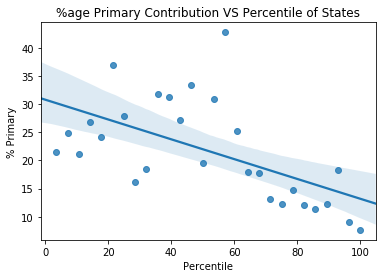

In [120]:
print('Correlation between Percentile and Percentage contribution of Primary is:')
print(round(np.corrcoef(list(z1.sort_values(by = 'GDP per capita', ascending = False)['% Primary'].values), list(pd.to_numeric(df_g1['Percentile'])))[0][1], 2))
sns.regplot(y = pd.to_numeric(list(z1.sort_values(by = 'GDP per capita', ascending = False)['% Primary'].values)), x = pd.to_numeric(df_g1['Percentile']))
plt.title('%age Primary Contribution VS Percentile of States')
plt.ylabel('% Primary')

In [121]:
result = x.transpose()
result.columns = result.iloc[0]
result = result.iloc[1:, :]
result['State'] = list(result.index)

In [122]:
def cat(n):
    if n in list(z.loc[z['Category'] == 'C1'].index):
        return 'C1'
    elif n in list(z.loc[z['Category'] == 'C2'].index):
        return 'C2'
    elif n in list(z.loc[z['Category'] == 'C3'].index):
        return 'C3'
    else:
        return 'C4'

In [123]:
result['Category'] = result['State'].apply(cat)
result.head()

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Category
Andhra Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977,Andhra Pradesh,C2
Arunachal Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,218728,631844,1636292,70099,30272,1676119,14870,112718,Arunachal Pradesh,C2
Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,1795658,9307109,18666897,1725309,582406,19809800,326780,60621,Assam,C4
Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,4587589,22179969,36184863,3213546,2006421,37391988,1101240,33954,Bihar,C4
Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,1112232,7588778,22228481,2601791,1332092,23498180,270530,86860,Chhattisgarh,C3


In [124]:
result1 = result.groupby('Category').sum()[['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services',
'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services',
'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Gross State Domestic Product']]
result1

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Category,,,,,,,,,,,,
C1,15993232.0,833510.0,19625045.0,2434878.0,12607184.0,15738265.0,7885253.0,4321519.0,15571552.0,4150701.0,9042352.0,118129206.0
C2,88427015.0,11613097.0,108002544.0,14541227.0,43975718.0,63729156.0,37760099.0,37812475.0,95695548.0,20189303.0,39486616.0,622828765.0
C3,28994177.0,9385092.0,18259272.0,4050466.0,11828535.0,13901840.0,7867052.0,4239374.0,13158791.0,7076156.0,9546854.0,135359991.0
C4,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,13486630.0,15859015.0,233252066.0


In [125]:
count = 0
r = []
for i in list(result1.iloc[0, :-1].sort_values(ascending = False).index):
    count = count + result1.loc['C1', i]
    if 100*(count/101930677.0) <= 80:
        r.append(i)

print('The top contributors for C1 are:')
print('')
for i in r:
    print(i)

The top contributors for C1 are:

Manufacturing
Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Real estate, ownership of dwelling & professional services
Construction


In [126]:
count = 0
r = []
for i in list(result1.iloc[1, :-1].sort_values(ascending = False).index):
    count = count + result1.loc['C2', i]
    if 100*(count/586380452.0) <= 80:
        r.append(i)

print('The top contributors for C2 are:')
print('')
for i in r:
    print(i)

The top contributors for C2 are:

Manufacturing
Real estate, ownership of dwelling & professional services
Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Construction
Other services


In [127]:
count = 0
r = []
for i in list(result1.iloc[2, :-1].sort_values(ascending = False).index):
    count = count + result1.loc['C3', i]
    if 100*(count/177966387.0) <= 80:
        r.append(i)

print('The top contributors for C3 are:')
print('')
for i in r:
    print(i)

The top contributors for C3 are:

Agriculture, forestry and fishing
Manufacturing
Trade, repair, hotels and restaurants
Real estate, ownership of dwelling & professional services
Construction
Other services
Mining and quarrying
Transport, storage, communication & services related to broadcasting
Public administration
Financial services
Electricity, gas, water supply & other utility services


In [128]:
count = 0
r = []
for i in list(result1.iloc[3, :-1].sort_values(ascending = False).index):
    count = count + result1.loc['C4', i]
    if 100*(count/233252066.0) <= 80:
        r.append(i)

print('The top contributors for C4 are:')
print('')
for i in r:
    print(i)

The top contributors for C4 are:

Agriculture, forestry and fishing
Trade, repair, hotels and restaurants
Manufacturing
Real estate, ownership of dwelling & professional services
Construction
Transport, storage, communication & services related to broadcasting


In [129]:
result2 = result1.transpose()

In [130]:
result2['Sub-Sectors'] = list(result1.iloc[:, :].transpose().index)

In [131]:
result2 = result2.iloc[:-1, :]
result2['GDP C1'] = 101930677.0

In [132]:
result2['GDP C2'] = 586380452.0
result2.head()

Category,C1,C2,C3,C4,Sub-Sectors,GDP C1,GDP C2
Item,,,,,,,
"Agriculture, forestry and fishing",15993232.0,88427015.0,28994177.0,56735044.0,"Agriculture, forestry and fishing",101930677.0,586380452.0
Mining and quarrying,833510.0,11613097.0,9385092.0,6096419.0,Mining and quarrying,101930677.0,586380452.0
Manufacturing,19625045.0,108002544.0,18259272.0,24987032.0,Manufacturing,101930677.0,586380452.0
"Electricity, gas, water supply & other utility services",2434878.0,14541227.0,4050466.0,4310264.0,"Electricity, gas, water supply & other utility...",101930677.0,586380452.0
Construction,12607184.0,43975718.0,11828535.0,22775948.0,Construction,101930677.0,586380452.0


In [133]:
result2['GDP C3'] = 177966387.0

In [134]:
result2['GDP C4'] = 233252066.0
result2.head()

Category,C1,C2,C3,C4,Sub-Sectors,GDP C1,GDP C2,GDP C3,GDP C4
Item,,,,,,,,,
"Agriculture, forestry and fishing",15993232.0,88427015.0,28994177.0,56735044.0,"Agriculture, forestry and fishing",101930677.0,586380452.0,177966387.0,233252066.0
Mining and quarrying,833510.0,11613097.0,9385092.0,6096419.0,Mining and quarrying,101930677.0,586380452.0,177966387.0,233252066.0
Manufacturing,19625045.0,108002544.0,18259272.0,24987032.0,Manufacturing,101930677.0,586380452.0,177966387.0,233252066.0
"Electricity, gas, water supply & other utility services",2434878.0,14541227.0,4050466.0,4310264.0,"Electricity, gas, water supply & other utility...",101930677.0,586380452.0,177966387.0,233252066.0
Construction,12607184.0,43975718.0,11828535.0,22775948.0,Construction,101930677.0,586380452.0,177966387.0,233252066.0


In [135]:
result2['% C1'] = 100*(result2['C1']/result2['GDP C1'])
result2['% C2'] = 100*(result2['C2']/result2['GDP C2'])
result2['% C3'] = 100*(result2['C3']/result2['GDP C3'])
result2['% C4'] = 100*(result2['C4']/result2['GDP C4'])
result2.head()

Category,C1,C2,C3,C4,Sub-Sectors,GDP C1,GDP C2,GDP C3,GDP C4,% C1,% C2,% C3,% C4
Item,,,,,,,,,,,,,
"Agriculture, forestry and fishing",15993232.0,88427015.0,28994177.0,56735044.0,"Agriculture, forestry and fishing",101930677.0,586380452.0,177966387.0,233252066.0,15.690303,15.080144,16.291940,24.323490
Mining and quarrying,833510.0,11613097.0,9385092.0,6096419.0,Mining and quarrying,101930677.0,586380452.0,177966387.0,233252066.0,0.817722,1.980471,5.273519,2.613661
Manufacturing,19625045.0,108002544.0,18259272.0,24987032.0,Manufacturing,101930677.0,586380452.0,177966387.0,233252066.0,19.253325,18.418510,10.259955,10.712459
"Electricity, gas, water supply & other utility services",2434878.0,14541227.0,4050466.0,4310264.0,"Electricity, gas, water supply & other utility...",101930677.0,586380452.0,177966387.0,233252066.0,2.388759,2.479828,2.275972,1.847900
Construction,12607184.0,43975718.0,11828535.0,22775948.0,Construction,101930677.0,586380452.0,177966387.0,233252066.0,12.368390,7.499520,6.646499,9.764521


In [136]:
result22 = result2.loc[:, ['Sub-Sectors', '% C1', '% C2', '% C3', '% C4']]
result22.head()

Category,Sub-Sectors,% C1,% C2,% C3,% C4
Item,,,,,
"Agriculture, forestry and fishing","Agriculture, forestry and fishing",15.690303,15.080144,16.291940,24.323490
Mining and quarrying,Mining and quarrying,0.817722,1.980471,5.273519,2.613661
Manufacturing,Manufacturing,19.253325,18.418510,10.259955,10.712459
"Electricity, gas, water supply & other utility services","Electricity, gas, water supply & other utility...",2.388759,2.479828,2.275972,1.847900
Construction,Construction,12.368390,7.499520,6.646499,9.764521


Text(0.5, 1.0, 'Percentage contribution of sub-sectors to GDP')

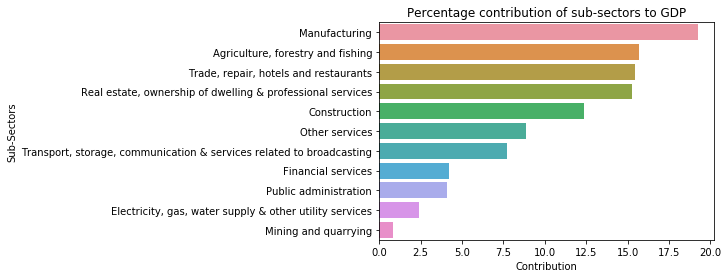

In [137]:
temp1 = result22.sort_values(by = '% C1', ascending = False)
sns.barplot(x = temp1['% C1'], y = temp1['Sub-Sectors'])
plt.xlabel('Contribution')
plt.title('Percentage contribution of sub-sectors to GDP')

Text(0.5, 1.0, 'Percentage contribution of sub-sectors to GDP')

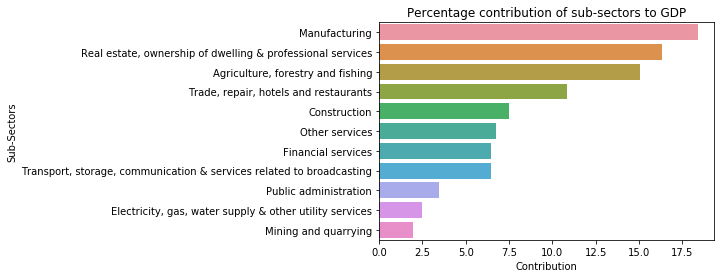

In [138]:
temp1 = result22.sort_values(by = '% C2', ascending = False)
sns.barplot(x = temp1['% C2'], y = temp1['Sub-Sectors'])
plt.xlabel('Contribution')
plt.title('Percentage contribution of sub-sectors to GDP')

Text(0.5, 1.0, 'Percentage contribution of sub-sectors to GDP')

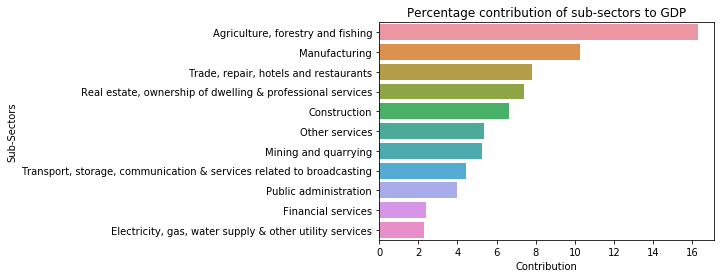

In [139]:
temp1 = result22.sort_values(by = '% C3', ascending = False)
sns.barplot(x = temp1['% C3'], y = temp1['Sub-Sectors'])
plt.xlabel('Contribution')
plt.title('Percentage contribution of sub-sectors to GDP')

Text(0.5, 1.0, 'Percentage contribution of sub-sectors to GDP')

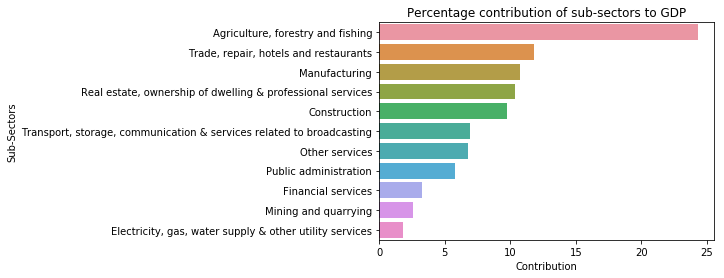

In [140]:
temp1 = result22.sort_values(by = '% C4', ascending = False)
sns.barplot(x = temp1['% C4'], y = temp1['Sub-Sectors'])
plt.xlabel('Contribution')
plt.title('Percentage contribution of sub-sectors to GDP')

Traditionally in India, agriculture has been the key component in the economy but if we look at C1 category apart from
agriculture, other sub-sectors are also contributing at least as much as agriculture. Especially in case of C3 and C4, dependance on agriculture is way more than it should be.

Across all the categories, Agriculture, forestry and fishing is in the top 3 highest contributors suggesting that it is 
relatively compared to others highly correlated with the GDP in the respective categories. Manufacturing also is in the top 3 except for C1 but there the difference between Manufacturing and the top 3 isn't much so Manufacturing is also highly correlated. Trade, repair, hotels and restaurants also seem to be highly correlated with the GDP.

The bottom 3 in case of C1 has very poor contribution compared to all the other sub-sectors so work needs to be
so work needs to be done in Mining, Electricity & gas, and Public Administration.

In case of C2 also Mining, Electricity & gas, and Public Administration contribute least so in here also more focus should be given to these sub-sectors.

In case of C3, Public Administraion, Financial Services, and Electricity & gas are the least contributors and consequently
requires attention.

In case of C4, Financial services, mining, and Electricity & gas are the least contributors so consequently they deserve
special attention.

Lastly, the performance of Electricity & gas, and Mining nationally is very poor so nationally we need to focus on these
sub-sectors even more.

If we look at C1, we notice that the top 4 sub-sectors are highly correlated with the GDP and in case of
other categories, fewer are highly correlated with the respective GDP. So what we can infer from this and which
also is in accordance with our intuition is that the economy of a state can improve overall only if all the sub-sectors
contribute equally which conversely means that the dominant dependance of an economy only on 1 sub-sector
isn't benificial for the economy of a state. So efforts must be made to improve the other sub-sectors which aren't highly
correlated with the GDP.

# DATA II

In [141]:
data2 = pd.read_csv('rs_session243_au570_1.1.csv')
data2.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [142]:
data22 = data2[['Level of Education - State', 'Primary - 2014-2015', 'Upper Primary - 2014-2015',
      'Secondary - 2014-2015']]
data22 = data22.drop([0, 5, 7, 8, 9, 18, 26, 35, 36])
data22['GDP per capita'] = list(x.loc[x['Item'] == 'Per Capita GSDP (Rs.)'].values[0][1:])

In [143]:
data22.head()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP per capita
1,Andhra Pradesh,4.35,5.20,15.71,104977.0
2,Arunachal Pradesh,10.89,6.71,17.11,112718.0
3,Assam,7.44,10.51,27.06,60621.0
4,Bihar,2.09,4.08,25.90,33954.0
6,Chhatisgarh,1.42,5.85,21.26,86860.0


Correlation between Primary and GDP per capita:  -0.4508060575919341


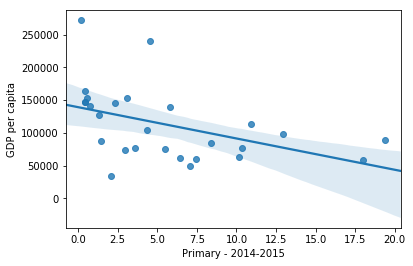

In [144]:
print('Correlation between Primary and GDP per capita: ', data22['Primary - 2014-2015'].corr(data22['GDP per capita']))
sns.regplot(data22['Primary - 2014-2015'], data22['GDP per capita'])

Correlation between Upper Primary and GDP per capita:  -0.5456514875066956


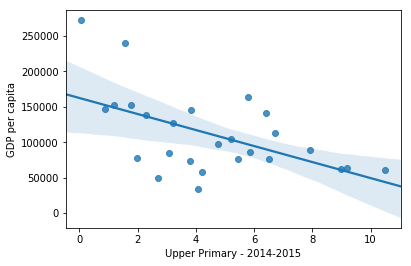

In [145]:
print('Correlation between Upper Primary and GDP per capita: ',data22['Upper Primary - 2014-2015'].corr(data22['GDP per capita']))
sns.regplot(data22['Upper Primary - 2014-2015'], data22['GDP per capita'])

Correlation between Secondary and GDP per capita:  -0.45935022406533166


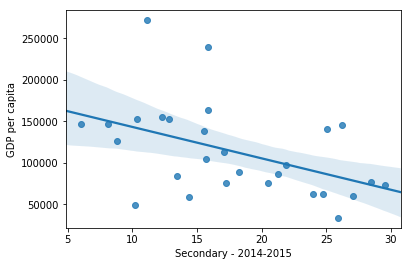

In [146]:
print('Correlation between Secondary and GDP per capita: ', data22['Secondary - 2014-2015'].corr(data22['GDP per capita']))
sns.regplot(data22['Secondary - 2014-2015'], data22['GDP per capita'])

As we can see there is negative correlation between GDP per capita and the dropout rates across all levels of education.
The result is very intuitive since higher the dropout rates, the less educated the people are and consequently the less
skilled people become. Such people lack skills to contribute towards the economy and hence GDP.

In [147]:
z1 = z1.sort_values(by = 'State')

The correlation between the 2 quantitites is :  0.48


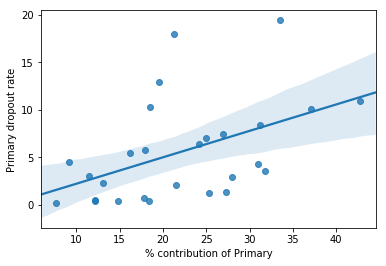

In [148]:
sns.regplot(x = pd.to_numeric(z1['% Primary']), y = list(data22['Primary - 2014-2015'].values))
plt.xlabel('% contribution of Primary')
plt.ylabel('Primary dropout rate')
a = pd.to_numeric(data22['Primary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Primary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  0.57


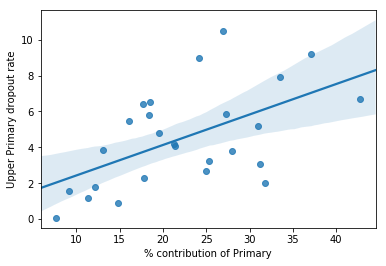

In [149]:
sns.regplot(pd.to_numeric(z1['% Primary']), list(data22['Upper Primary - 2014-2015'].values))
plt.ylabel('Upper Primary dropout rate')
plt.xlabel('% contribution of Primary')
a = pd.to_numeric(data22['Upper Primary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Primary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  0.37


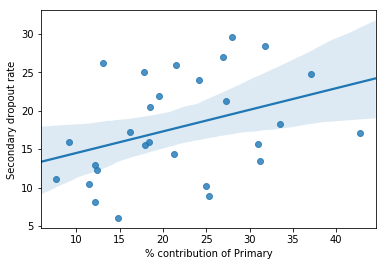

In [150]:
sns.regplot(pd.to_numeric(z1['% Primary']), list(data22['Secondary - 2014-2015'].values))
plt.ylabel('Secondary dropout rate')
plt.xlabel('% contribution of Primary')
a = pd.to_numeric(data22['Secondary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Primary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  -0.51


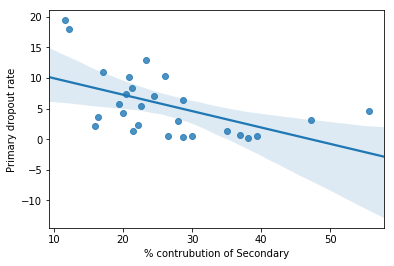

In [151]:
sns.regplot(pd.to_numeric(z1['% Secondary']), list(data22['Primary - 2014-2015'].values))
plt.xlabel('% contrubution of Secondary')
plt.ylabel('Primary dropout rate')
a = pd.to_numeric(data22['Primary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Secondary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  -0.4


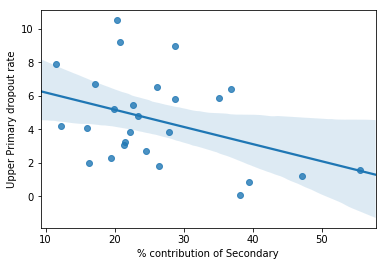

In [152]:
sns.regplot(pd.to_numeric(z1['% Secondary']), list(data22['Upper Primary - 2014-2015'].values))
plt.ylabel('Upper Primary dropout rate')
plt.xlabel('% contribution of Secondary')
a = pd.to_numeric(data22['Upper Primary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Secondary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  -0.27


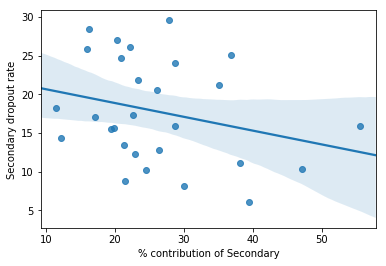

In [153]:
sns.regplot(pd.to_numeric(z1['% Secondary']), list(data22['Secondary - 2014-2015'].values))
plt.ylabel('Secondary dropout rate')
plt.xlabel('% contribution of Secondary')
a = pd.to_numeric(data22['Secondary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Secondary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  0.34


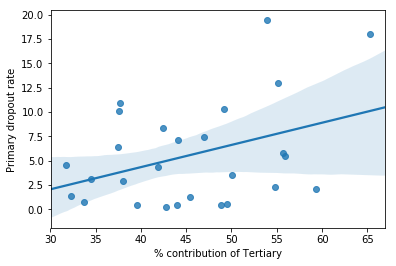

In [154]:
sns.regplot(pd.to_numeric(z1['% Tertiary']), list(data22['Primary - 2014-2015'].values))
plt.ylabel('Primary dropout rate')
plt.xlabel('% contribution of Tertiary')
a = pd.to_numeric(data22['Primary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Tertiary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  -0.05


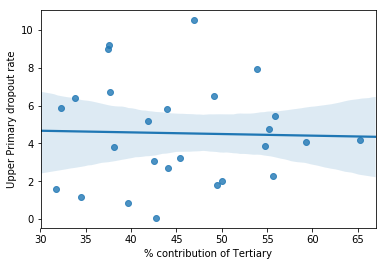

In [155]:
sns.regplot(pd.to_numeric(z1['% Tertiary']), list(data22['Upper Primary - 2014-2015'].values))
plt.ylabel('Upper Primary dropout rate')
plt.xlabel('% contribution of Tertiary')
a = pd.to_numeric(data22['Upper Primary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Tertiary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

The correlation between the 2 quantitites is :  0.01


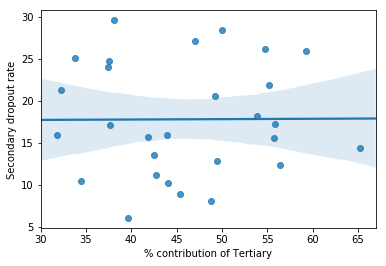

In [156]:
sns.regplot(pd.to_numeric(z1['% Tertiary']), list(data22['Secondary - 2014-2015'].values))
plt.ylabel('Secondary dropout rate')
plt.xlabel('% contribution of Tertiary')
a = pd.to_numeric(data22['Secondary - 2014-2015'].fillna(method = 'ffill')).values
b = pd.to_numeric(z1['% Tertiary'].values)
print('The correlation between the 2 quantitites is : ',round(np.corrcoef(a, b)[1, 0], 2))

In [157]:
i = list(x.loc[x['Item'] == "Population ('00)"].values[0][1:])
i = [int(u) for u in i]
data22['Population'] = i

In [158]:
round(data22.corr().loc[['Population'], ['Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']], 2)

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
Population,-0.22,-0.06,-0.06


***Hypothesis 1:*** One would expect a positive correlation between the dropout rates and the population since more the population, more the number of kids who could drop. Had the correlation been +1, it would've meant as the population of a state increases, the GDP per capita decreases and hence the dropout rates. Had it been -1, it would've meant that larger the population the lower the dropout rates which could've been interpreted as follows: The larger the population, the better the GDP per capita which enables the parents to take care of the educational needs of the children. So the 'slightly' negative values can be interpreted as follows: In 'FEW' large population states, the economy is doing good which which enables the parents to fullfill the educational requirements of the children.

***Hypothesis 2:***
In case of Primary dropout rate vs % of Primary contribution, the increase in dropout rate results in the increase
of % of Primary contribution since the sub-sectors in Primary are agricultural in nature. These sub-sectors typically
don't need highly educated individuals, hence children dropping in the primary can contribute towards it which does
happen in villages.

Again we see a strong positive correlation between Upper Primary dropout rate vs % of Primary contribution. The reason 
is the same as mentioned above. The addition being that in upper primary the children are older and hence physically
more capable compared to their primary counterparts.